In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import os
import datetime
import glob
#import shapefile as shp

In [ ]:
#load station information data
df= pd.read_parquet('/workspaces/codespaces-jupyter/data/bicing_status.parquet')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
4,1,2019,7,1,1,False,summer,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462
5,1,2019,7,1,1,False,summer,5,21.5,4.5,0.038462,0.038462,0.038462,0.038462,0.173077
6,1,2019,7,1,1,False,summer,6,16.0,10.0,0.173077,0.038462,0.038462,0.038462,0.384615
7,1,2019,7,1,1,False,summer,7,9.5,16.5,0.384615,0.173077,0.038462,0.038462,0.634615
8,1,2019,7,1,1,False,summer,8,1.0,25.0,0.634615,0.384615,0.173077,0.038462,0.961538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116747,529,2021,8,16,1,False,summer,10,198.0,99.0,0.333333,0.333333,0.333333,0.333333,0.333333
15116748,530,2020,8,12,3,False,summer,8,198.0,99.0,0.333333,0.333333,0.333333,0.333333,0.333333
15116749,530,2020,8,12,3,False,summer,9,198.0,99.0,0.333333,0.333333,0.333333,0.333333,0.333333
15116750,530,2020,12,3,4,False,winter,15,198.0,99.0,0.333333,0.333333,0.333333,0.333333,0.333333


In [ ]:
df.shape

(15116748, 15)

In [ ]:
#missing data
df.isna().sum()

station_id                    0
year                          0
month                         0
day                           0
weekday                       0
weekend                       0
season                        0
hour                          0
num_bikes_available           0
num_docks_available           0
ctx_1                         0
ctx_2                         0
ctx_3                         0
ctx_4                         0
percentage_docks_available    0
dtype: int64

In [ ]:
#chech data format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15116748 entries, 4 to 15116751
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  uint16 
 1   year                        uint16 
 2   month                       uint8  
 3   day                         uint8  
 4   weekday                     uint8  
 5   weekend                     bool   
 6   season                      object 
 7   hour                        uint8  
 8   num_bikes_available         float32
 9   num_docks_available         float32
 10  ctx_1                       float32
 11  ctx_2                       float32
 12  ctx_3                       float32
 13  ctx_4                       float32
 14  percentage_docks_available  float32
dtypes: bool(1), float32(7), object(1), uint16(2), uint8(4)
memory usage: 764.1+ MB


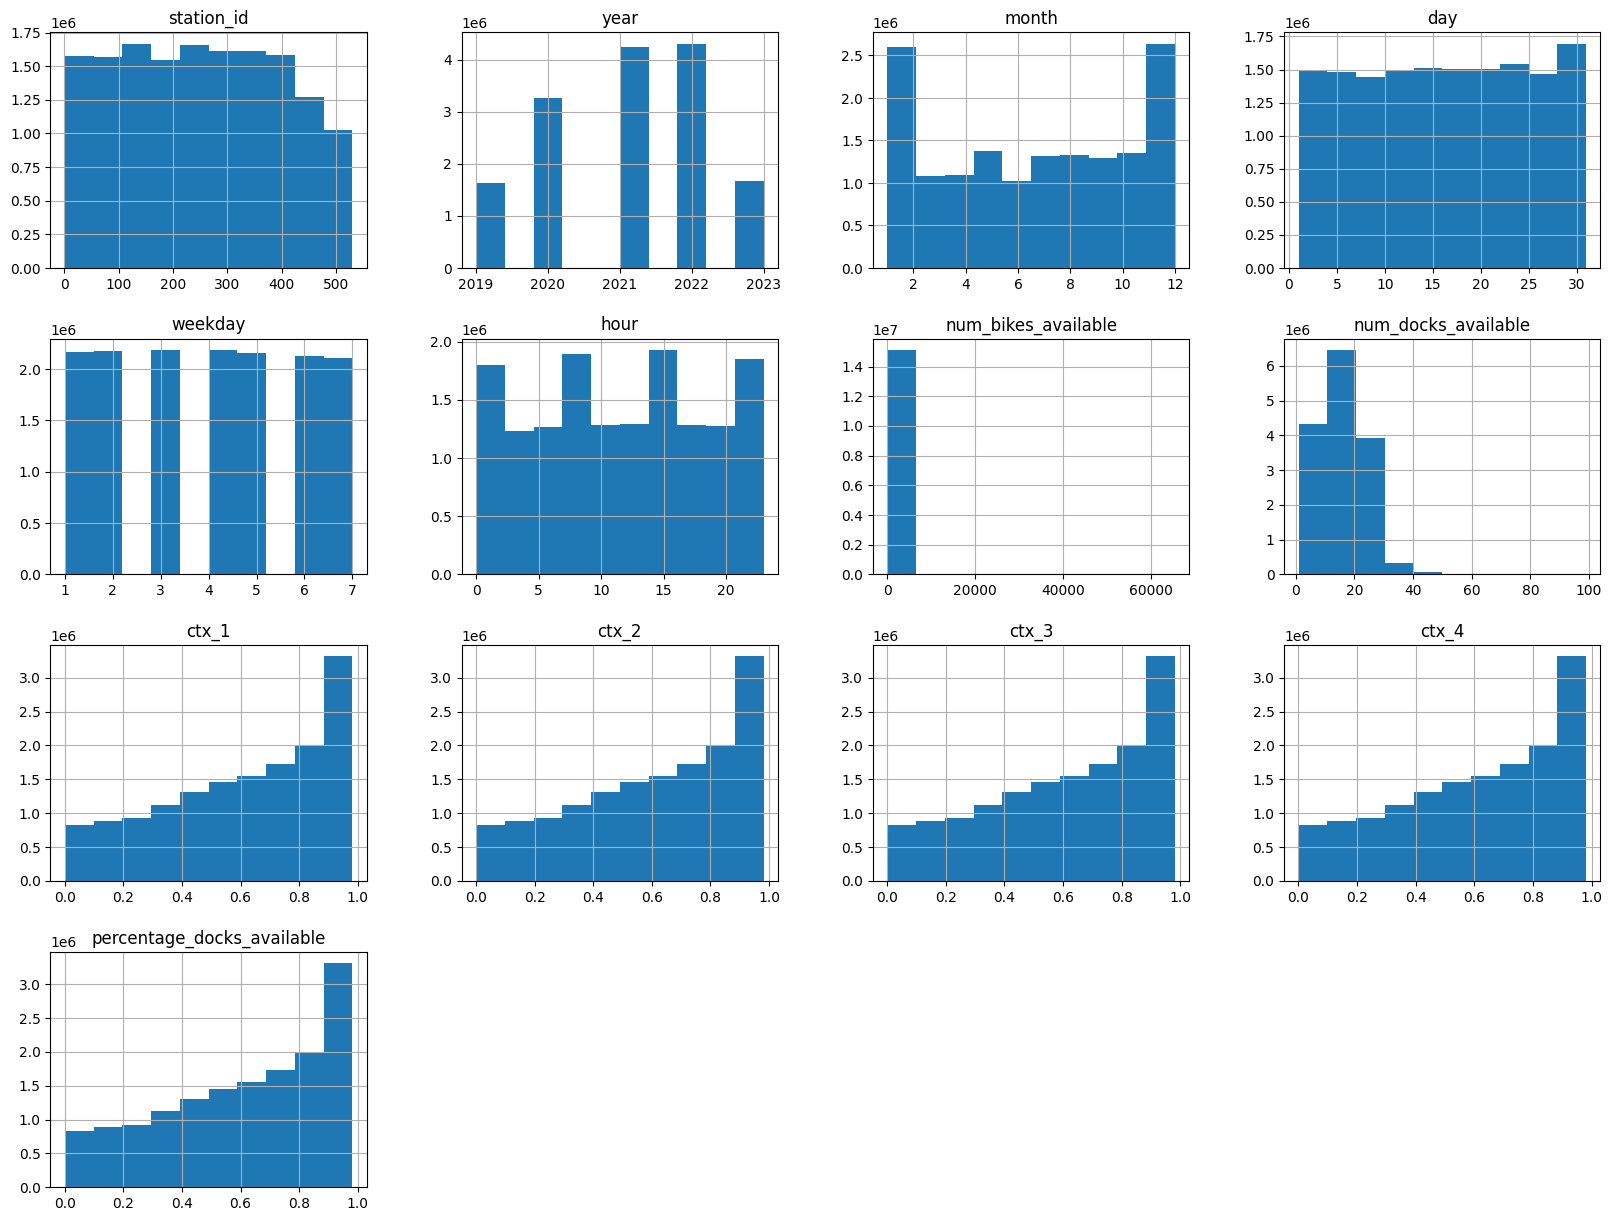

In [ ]:
df.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
df.describe()

,station_id,year,month,day,weekday,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
count,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07,1.511675e+07
mean,2.523461e+02,2.021073e+03,6.614376e+00,1.576864e+01,3.980793e+00,1.157190e+01,1.010241e+01,1.553866e+01,6.081650e-01,6.081651e-01,6.081647e-01,6.081648e-01,6.081647e-01
std,1.460812e+02,1.170434e+00,3.493727e+00,8.782417e+00,1.992957e+00,6.856760e+00,5.184237e+01,8.103662e+00,2.791933e-01,2.791933e-01,2.791934e-01,2.791934e-01,2.791933e-01
min,1.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.745870e-04,2.745870e-04,2.745870e-04,2.745870e-04,2.745870e-04
25%,1.270000e+02,2.020000e+03,4.000000e+00,8.000000e+00,2.000000e+00,6.000000e+00,3.000000e+00,9.500000e+00,3.942308e-01,3.942308e-01,3.942308e-01,3.942308e-01,3.942308e-01
50%,2.510000e+02,2.021000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.200000e+01,8.500000e+00,1.600000e+01,6.538461e-01,6.538461e-01,6.538461e-01,6.538461e-01,6.538461e-01
75%,3.750000e+02,2.022000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.700000e+01,1.500000e+01,2.100000e+01,8.636364e-01,8.636364e-01,8.636364e-01,8.636364e-01,8.636364e-01
max,5.300000e+02,2.023000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,6.553500e+04,9.900000e+01,9.814815e-01,9.814815e-01,9.814815e-01,9.814815e-01,9.814815e-01


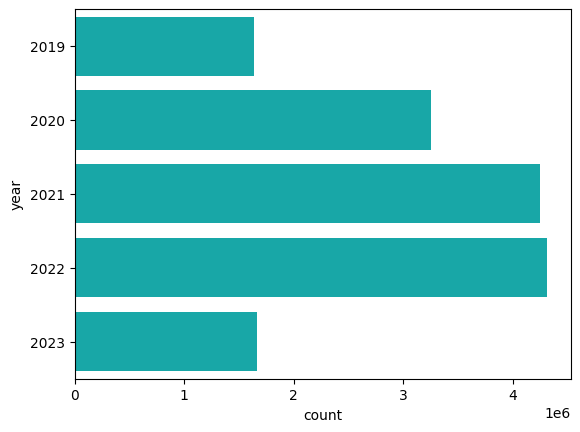

In [ ]:
#plot data by year
sns.countplot(y="year", data=df, color="c")
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['month',
                        'percentage_docks_available',
                        'year']],
              x='month',
              y='percentage_docks_available',
              hue='year',
              ax=ax)
ax.set(title="Yearly wise month distribution of availability")

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

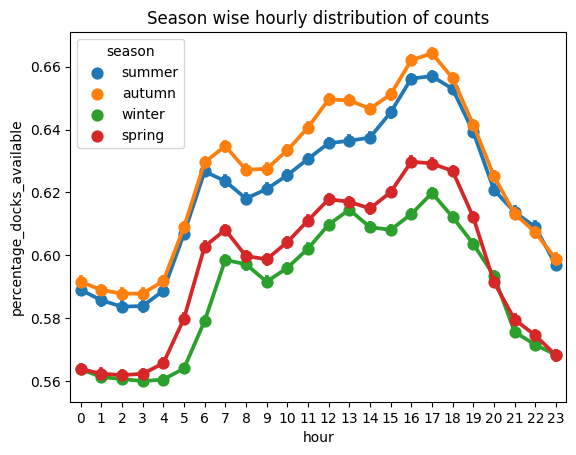

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                        'percentage_docks_available',
                        'season']],
              x='hour',
              y='percentage_docks_available',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of availability")

[Text(0.5, 1.0, 'Monthly wise hourly distribution of counts')]

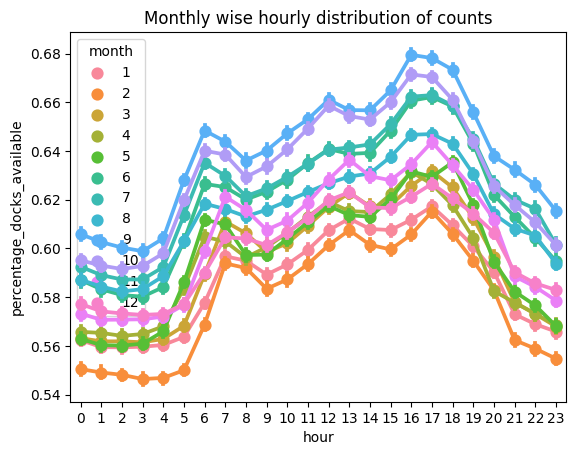

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                        'percentage_docks_available',
                        'month']],
              x='hour',
              y='percentage_docks_available',
              hue='month',
              ax=ax)
ax.set(title="Monthly wise hourly distribution of availability")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

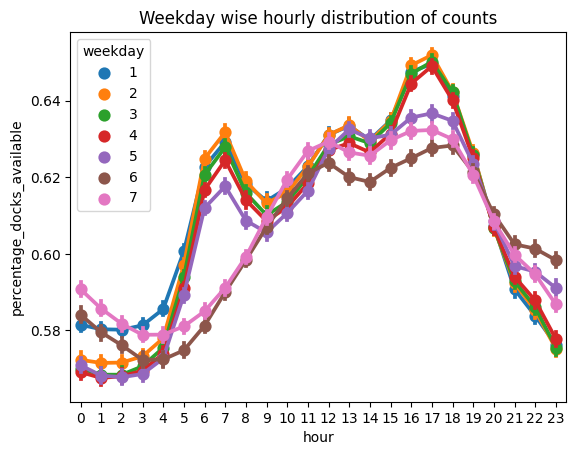

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hour',
                       'percentage_docks_available',
                       'weekday']],
              x='hour',
              y='percentage_docks_available',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of availability")

[Text(0.5, 1.0, 'percentage_docks_available')]

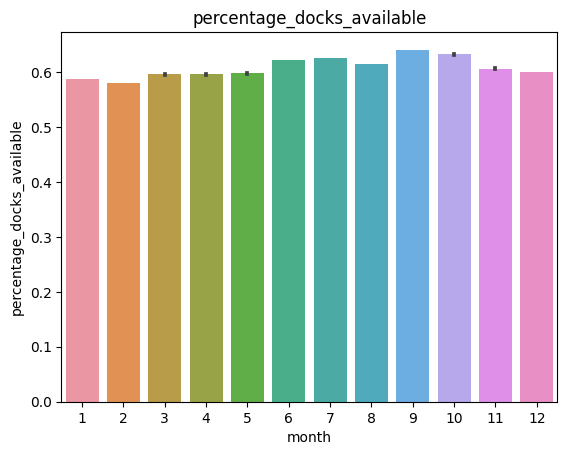

In [ ]:
fig,ax = plt.subplots()
sns.barplot(data=df[['month',
                    'percentage_docks_available']],
              x='month',
              y='percentage_docks_available',
              ax=ax)
ax.set(title='percentage_docks_available')

[Text(0.5, 1.0, 'Docks availables in day hours')]

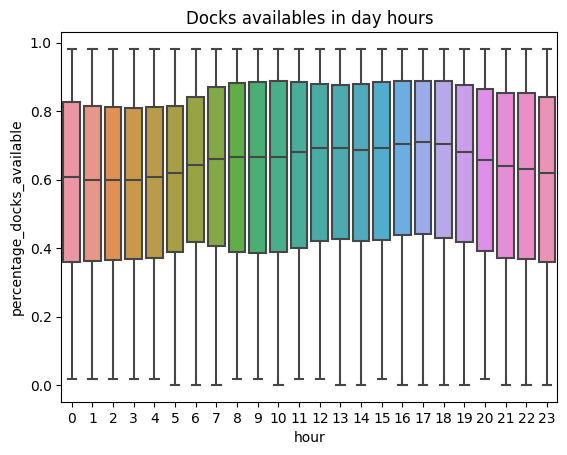

In [ ]:
fig,ax = plt.subplots()
sns.boxplot(data=df[['percentage_docks_available',
                          'hour']],x='hour',y='percentage_docks_available',ax=ax)
ax.set(title="Docks availables in day hours")

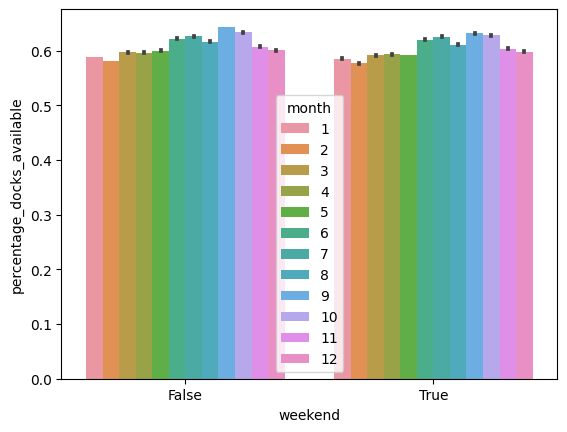

In [ ]:
sns.barplot(data=df,x='weekend',y='percentage_docks_available',hue='month')
ax.set_title('Weekend wise distribution by month')
plt.show()

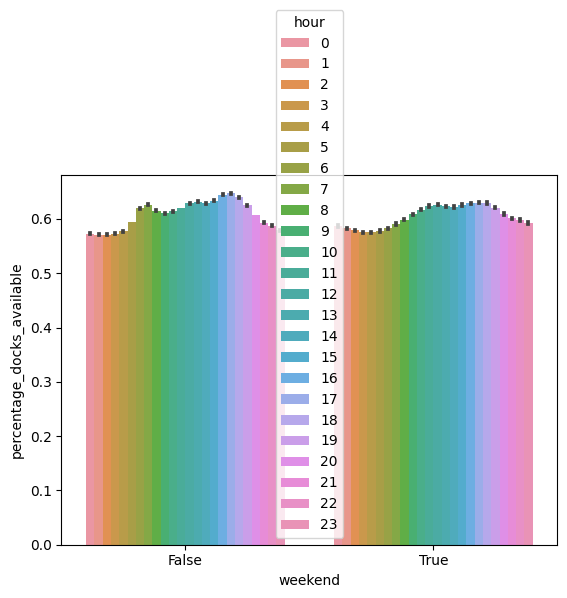

In [ ]:
sns.barplot(data=df,x='weekend',y='percentage_docks_available',hue='hour')
ax.set_title('Weekend wise distribution by hour')
plt.show()

In [ ]:
#load station information data
stations = pd.read_csv('/workspaces/codespaces-jupyter/data/2023_04_Abril_BicingNou_INFORMACIO.csv')
variables=['station_id','lat','lon','altitude','post_code','capacity']
stations=stations[variables]


In [ ]:
a=df[::8000]

In [ ]:
a=a.merge(stations,how='inner')

In [ ]:
a

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available,lat,lon,altitude,post_code,capacity
0,1,2019,7,1,1,False,summer,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462,41.397978,2.180107,16,8013,46
1,1,2019,7,1,1,False,summer,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462,41.397978,2.180107,16,8013,46
2,1,2019,7,1,1,False,summer,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462,41.397978,2.180107,16,8013,46
3,1,2019,7,1,1,False,summer,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462,41.397978,2.180107,16,8013,46
4,1,2019,7,1,1,False,summer,4,25.0,1.0,0.038462,0.038462,0.038462,0.038462,0.038462,41.397978,2.180107,16,8013,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408277,519,2022,11,10,4,False,autumn,9,1.0,21.0,0.954545,0.704545,0.409091,0.363636,0.954545,41.424655,2.166289,110,8032,24
13408278,519,2022,11,10,4,False,autumn,9,1.0,21.0,0.954545,0.704545,0.409091,0.363636,0.954545,41.424655,2.166289,110,8032,24
13408279,519,2022,11,10,4,False,autumn,9,1.0,21.0,0.954545,0.704545,0.409091,0.363636,0.954545,41.424655,2.166289,110,8032,24
13408280,519,2022,11,10,4,False,autumn,9,1.0,21.0,0.954545,0.704545,0.409091,0.363636,0.954545,41.424655,2.166289,110,8032,24


In [ ]:
#hay que hace groupby de estacion, clacular mean aailability y plotear eso
c=a.groupby(['station_id']).mean()

/tmp/ipykernel_18756/633573381.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c=a.groupby(['station_id']).mean()


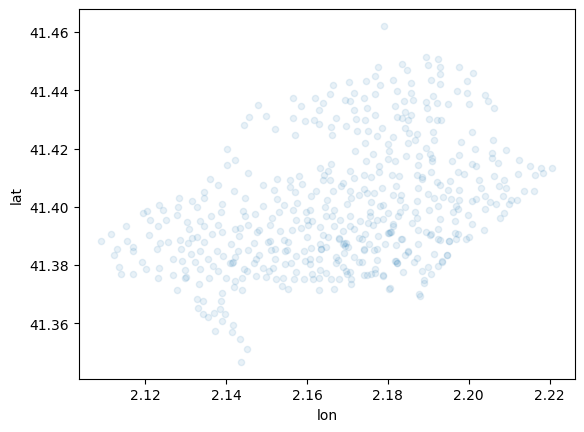

In [ ]:
c.plot(kind="scatter", x='lon', y='lat', alpha=0.1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


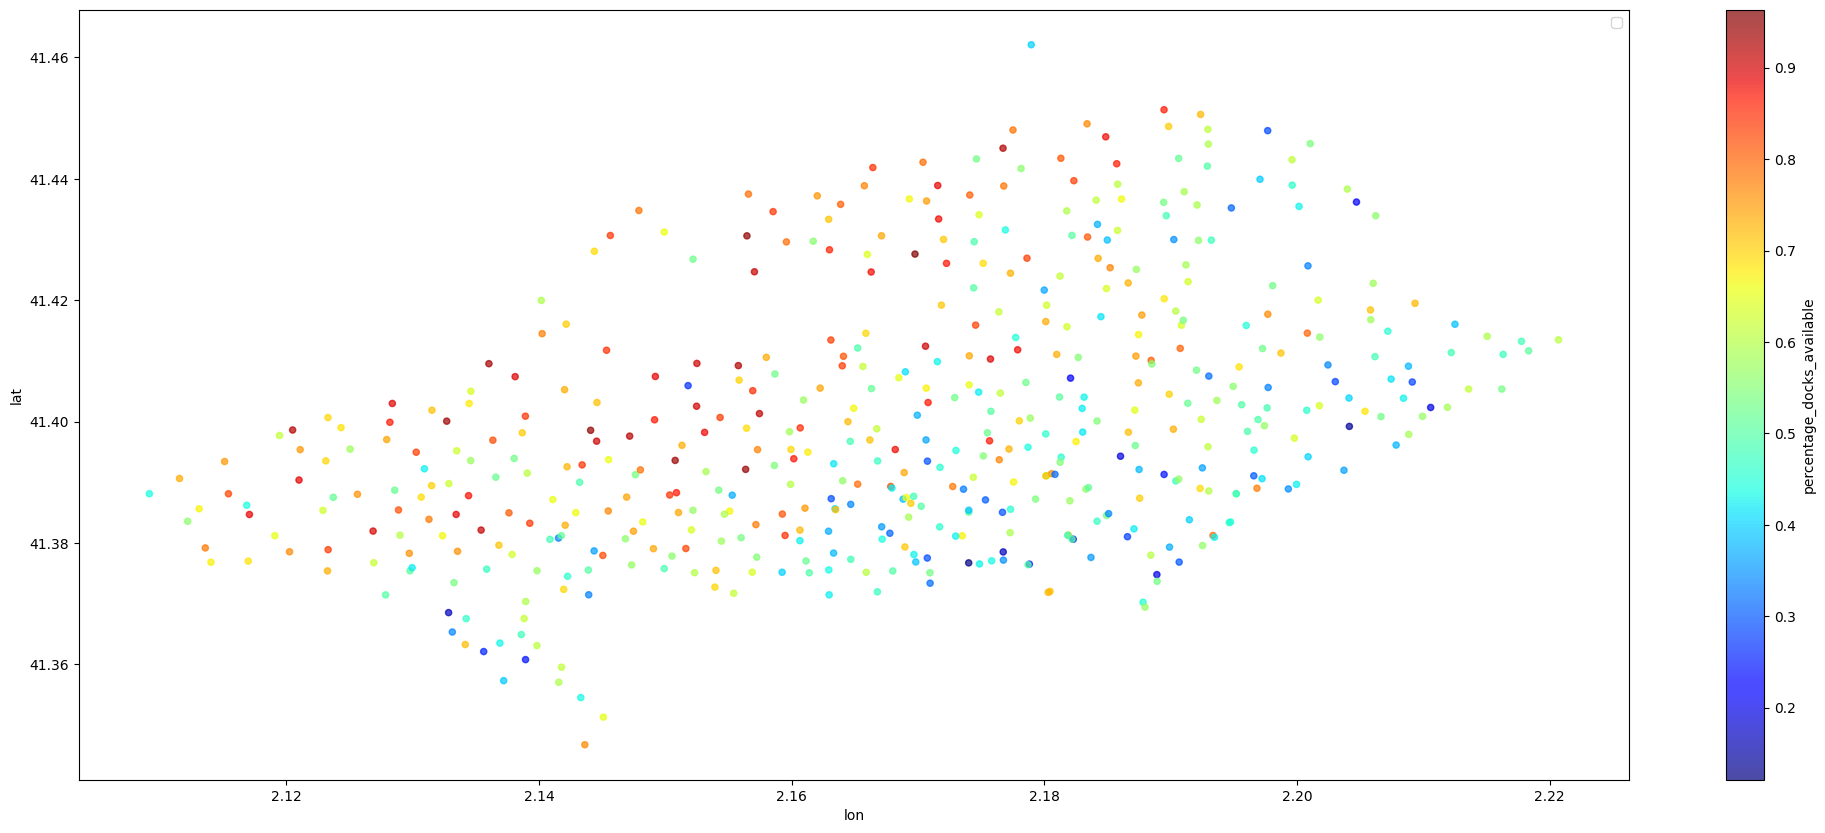

In [ ]:
c.plot(kind="scatter", x="lon", y="lat", alpha=0.7,
             figsize=(25,10),
             c="percentage_docks_available", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

/tmp/ipykernel_19890/4273315869.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(a.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')


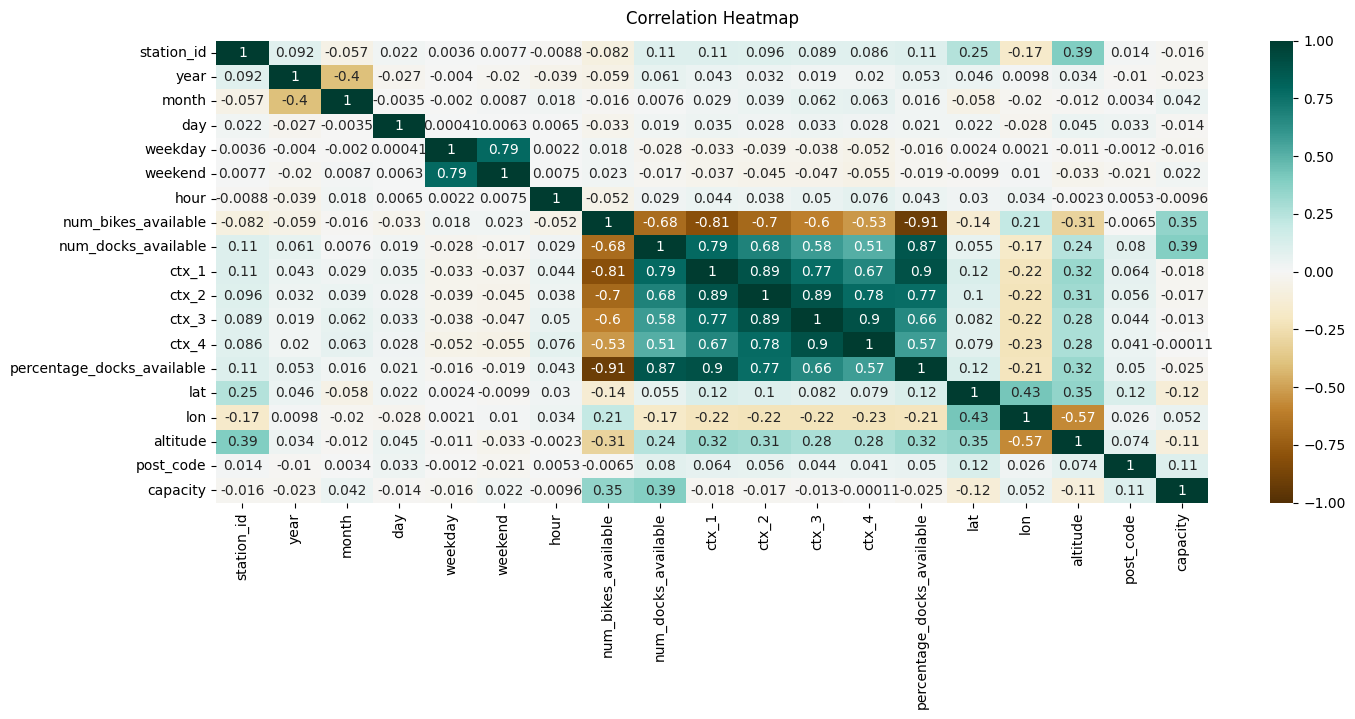

In [ ]:
#variables correlation heatmap
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(a.corr(), vmin=-1, vmax=1, annot=True,cmap='RdBu')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);